<a href="https://colab.research.google.com/github/AKASH-RJ/data_science/blob/main/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("students_dataset.csv")
df

,Name,High School GPA,Extracurriculars,Parental Income (₹/month),Study Hours/Week,Entrance Test Score,Distance (km),Internet,Final Year Result
0,Arjun,8.7,3,28000,15,82,5,Yes,Pass
1,Divya,9.2,2,35000,20,89,12,Yes,Grade A
2,Karthik,7.8,1,22000,10,74,35,No,Pass
3,Lakshmi,9.5,4,45000,25,91,3,Yes,Grade A+
4,Manoj,6.9,0,18000,5,60,40,No,Fail
5,Priya,8.3,2,32000,12,78,8,Yes,Pass
6,Ramesh,7.5,1,25000,9,70,18,Yes,Pass
7,Sneha,9.1,3,39000,18,88,4,Yes,Grade A
8,Suresh,6.8,0,20000,6,65,30,No,Fail
9,Anjali,9.3,4,42000,22,92,2,Yes,Grade A+


In [ ]:
print("Target Variable Distribution:")
print(df["Final Year Result"].value_counts())

Target Variable Distribution:
Final Year Result
Pass        19
Fail        11
Grade A      7
Grade B      7
Grade A+     6
Name: count, dtype: int64


In [ ]:
df_encoded = df.copy()
label_encoders = {}

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df[col])
        label_encoders[col] = le

In [ ]:
X = df_encoded.drop(columns=["Final Year Result", "Name"])
y = df_encoded["Final Year Result"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
print(f"\nModel Type: Decision Tree Classifier (Multi-class)")
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(report)


Model Type: Decision Tree Classifier (Multi-class)
Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [ ]:
actual_counts = pd.Series(y_test).value_counts().reindex(range(len(class_labels)), fill_value=0)
predicted_counts = pd.Series(y_pred).value_counts().reindex(range(len(class_labels)), fill_value=0)

In [ ]:
bar_width = 0.35
x = range(len(class_labels))

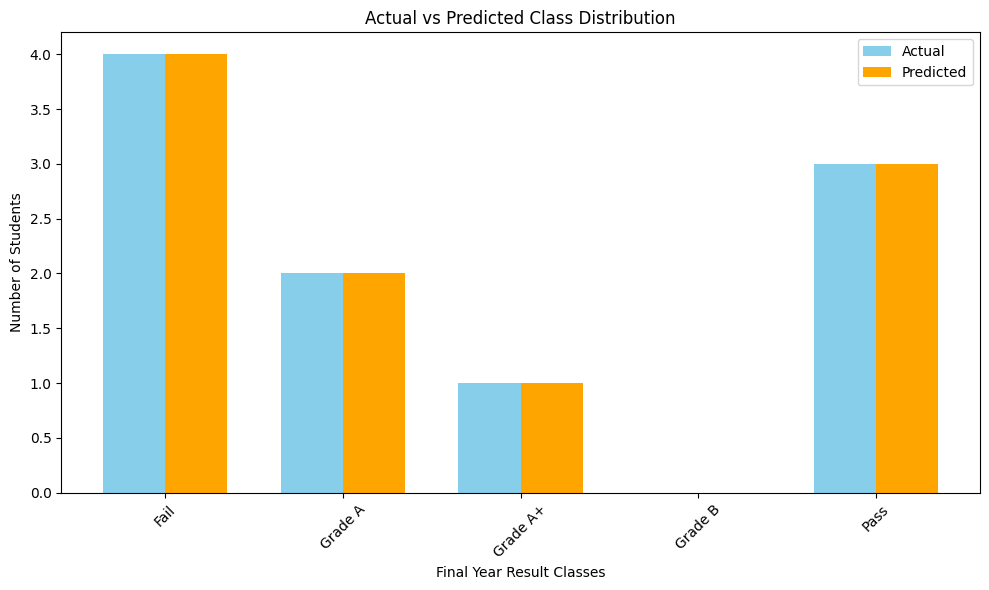

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(x, actual_counts, width=bar_width, label='Actual', color='skyblue')
plt.bar([i + bar_width for i in x], predicted_counts, width=bar_width, label='Predicted', color='orange')
plt.xlabel("Final Year Result Classes")
plt.ylabel("Number of Students")
plt.title("Actual vs Predicted Class Distribution")
plt.xticks([i + bar_width / 2 for i in x], class_labels, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()